<a href="https://colab.research.google.com/github/Patil-Ojas/Face-Mask-Detection/blob/main/facemask_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
  !pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from keras.applications.mobilenet_v2 import preprocess_input
from keras.utils import img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import cv2
import os

In [28]:
# from os.path import dirname, join,__file__
prototxtPath = '/content/drive/MyDrive/facemask_data/Facemask_Detection-master/Facemask_Detection-master/deploy.prototxt.txt'
weightsPath= '/content/drive/MyDrive/facemask_data/Facemask_Detection-master/Facemask_Detection-master/res10_300x300_ssd_iter_140000.caffemodel'

In [29]:
prototxtPath

'/content/drive/MyDrive/facemask_data/Facemask_Detection-master/Facemask_Detection-master/deploy.prototxt.txt'

In [30]:
net=cv2.dnn.readNet(weightsPath,prototxtPath)

In [31]:
net

< cv2.dnn.Net 0x7f9d9bf03930>

In [32]:
## Load model
model=load_model(r'/content/drive/MyDrive/facemask_data/Facemask_Detection-master/Facemask_Detection-master/model/ai_collab_4000_32_100.h5')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496 

In [33]:
dataset = "test"
imagePaths=list(paths.list_images(dataset))
data=[]

for i in imagePaths:
    data.append(i)

In [34]:
image=cv2.imread("/content/drive/MyDrive/facemask_data/Facemask_Detection-master/Facemask_Detection-master/my-demo-imgs/download.jpeg")

In [35]:
image.shape

(480, 640, 3)

In [36]:
(h,w)=image.shape[:2]
print(h)
print(w)

480
640


In [37]:
blob=cv2.dnn.blobFromImage(image,1.0,(300,300),(104.0,177.0,123.0))
blob.shape
print(blob.shape)
net.setInput(blob)
detections = net.forward()

(1, 3, 300, 300)


In [38]:
detections

array([[[[0.        , 1.        , 0.9955889 , ..., 0.35603297,
          0.9946603 , 0.751557  ],
         [0.        , 1.        , 0.3673271 , ..., 0.20647867,
          0.4551063 , 0.67276955],
         [0.        , 1.        , 0.12177941, ..., 4.005395  ,
          0.82799864, 4.991725  ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

In [39]:
det =[]
a=0
for i in range(0,detections.shape[2]):
    confidence=detections[0,0,i,2]
    # print("CONF: ",confidence)
    if confidence>0.3:
        box=detections[0,0,i,3:7]*np.array([w,h,w,h])
        (startX,startY,endX,endY)=box.astype('int')
        (startX,startY)=(max(0,startX),max(0,startY))
        (endX,endY)=(min(w-1,endX), min(h-1,endY))
        face=image[startY:endY, startX:endX]
        face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
        face=cv2.resize(face,(96,96))
        det.append(face)
        face=img_to_array(face)
        face=preprocess_input(face)
        face=np.expand_dims(face,axis=0)
        
        (mask,withoutMask)=model.predict(face)[0]
        print("With MASK: ",mask)
        print("Without MASK: ",withoutMask)
        #determine the class label and color we will use to draw the bounding box and text
        label='No Mask' if withoutMask>mask else 'Mask'
        color=(0,255,0) if label=='Mask' else (255,0,0)
        #include the probability in the label
        label="{}: {:.2f}%".format(label,max(mask,withoutMask)*100)
        
        #display the label and bounding boxes
        cv2.putText(image,label,(startX,startY-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)
        cv2.rectangle(image,(startX,startY),(endX,endY),color,2)   
        a=a+1

1/1 [==============================] - 0s 116ms/step
With MASK:  4.6357807e-05
Without MASK:  0.9999536
1/1 [==============================] - 0s 26ms/step
With MASK:  0.9990821
Without MASK:  0.00091795134


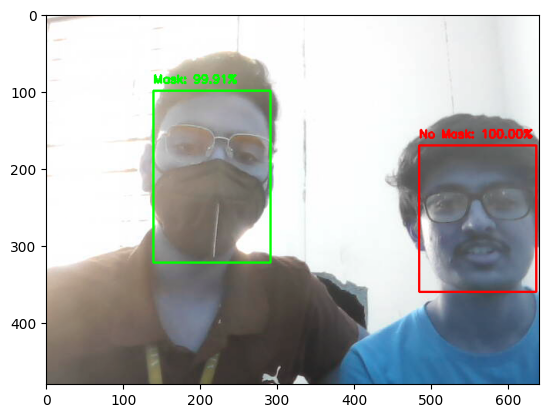

In [40]:
plt.imshow(image)